In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [11]:
df=pd.read_csv("loan.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
df.shape

(614, 13)

We have 614 rows and 13 columns in df dataset

In [13]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

These are the total columns present in df dataset,where "Loan_Status" is our target variable

In [14]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

We have string,integer and float type data,hence encoding needs to be applied 

In [15]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Nan values are present in Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History columns

<AxesSubplot:>

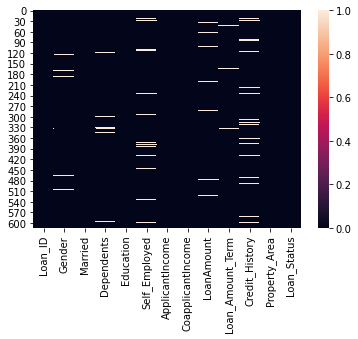

In [16]:
sns.heatmap(df.isnull())

We dont observe much null values present in the dataset,thus we will drop all the nan values

In [17]:
df.dropna(inplace=True)
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
df.shape

(480, 13)

Dropped values are no longer present in the dataset 

In [28]:
df.Loan_Status.unique()

array([0., 1.])

In Target/dependable variable is binary in nature

Loan_Status has two type of class i.e, 0 & 1

In [29]:
df.Loan_Status.value_counts()

1.0    332
0.0    148
Name: Loan_Status, dtype: int64

Class imbalance is present as in 1.0 we have 332 counts and 0.0 we have 148 counts

# APPLY ENCODING

In [18]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [19]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1.0
3,2.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1.0
4,3.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1.0
5,4.0,1.0,1.0,2.0,0.0,1.0,5417,4196.0,267.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,475.0,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.0,360.0,1.0,0.0,1.0
610,476.0,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.0,180.0,1.0,0.0,1.0
611,477.0,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.0,360.0,1.0,2.0,1.0
612,478.0,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.0,360.0,1.0,2.0,1.0


In [21]:
df.dtypes

Loan_ID              float64
Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

We convert the datas from string to float type by using  OrdinalEncoder

In [22]:
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,239.500000,0.820833,0.647917,0.777083,0.202083,0.137500,5364.231250,1581.093583,144.735417,342.050000,0.854167,1.022917,0.691667
std,138.708327,0.383892,0.478118,1.020815,0.401973,0.344734,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.776411,0.462287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,119.750000,1.000000,0.000000,0.000000,0.000000,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,239.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,359.250000,1.000000,1.000000,2.000000,0.000000,0.000000,5852.500000,2253.250000,170.000000,360.000000,1.000000,2.000000,1.000000
max,479.000000,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000,2.000000,1.000000


Here is the statistical summary of df dataset

Key observation:
 
 1. The mean higher than the median(50th percentile) in columns 'ApplicantIncome','CoapplicantIncome','LoanAmount',skewness might be present in these columns
 2. we observe extreme difference between the 75th percentile and max in column 'ApplicantIncome','CoapplicantIncome','LoanAmount',outliers can be present in these columns


# DATA VISUALIZATION 

To check he missing values

<AxesSubplot:>

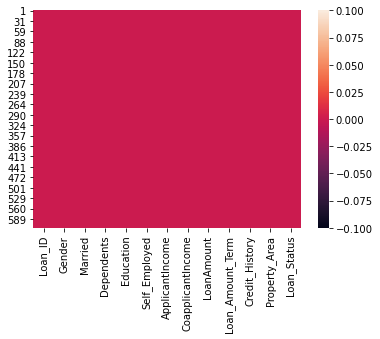

In [23]:
sns.heatmap(df.isnull())

No missing values are present in df dataset

# To check the correlation

In [25]:
cor=df.corr()
cor

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.023210,0.005776,0.077974,0.028438,0.049772,0.038843,-0.011608,0.049712,-0.004265,-0.018872,-0.197603,0.040306
Gender,-0.023210,1.000000,0.349424,0.217510,0.059245,-0.002761,0.032644,0.156171,0.098975,-0.088704,0.022447,-0.000204,0.064504
Married,0.005776,0.349424,1.000000,0.386367,0.001652,0.015674,0.036717,0.102950,0.183442,-0.107504,0.029095,0.038653,0.112321
Dependents,0.077974,0.217510,0.386367,1.000000,0.028608,0.045754,0.131139,-0.000318,0.172780,-0.096361,-0.026651,0.001191,0.035428
Education,0.028438,0.059245,0.001652,0.028608,1.000000,-0.005085,-0.131172,-0.074499,-0.172780,-0.102168,-0.056656,-0.055005,-0.068437
Self_Employed,0.049772,-0.002761,0.015674,0.045754,-0.005085,1.000000,0.170785,-0.001509,0.120389,-0.034852,-0.023568,-0.050797,-0.034715
ApplicantIncome,0.038843,0.032644,0.036717,0.131139,-0.131172,0.170785,1.000000,-0.112588,0.495310,-0.010838,-0.056152,-0.053160,-0.043152
CoapplicantIncome,-0.011608,0.156171,0.102950,-0.000318,-0.074499,-0.001509,-0.112588,1.000000,0.190740,-0.005775,-0.008692,0.006540,-0.049020
LoanAmount,0.049712,0.098975,0.183442,0.172780,-0.172780,0.120389,0.495310,0.190740,1.000000,0.050867,-0.040773,-0.109685,-0.071753
Loan_Amount_Term,-0.004265,-0.088704,-0.107504,-0.096361,-0.102168,-0.034852,-0.010838,-0.005775,0.050867,1.000000,0.032937,-0.058656,-0.007798


<AxesSubplot:>

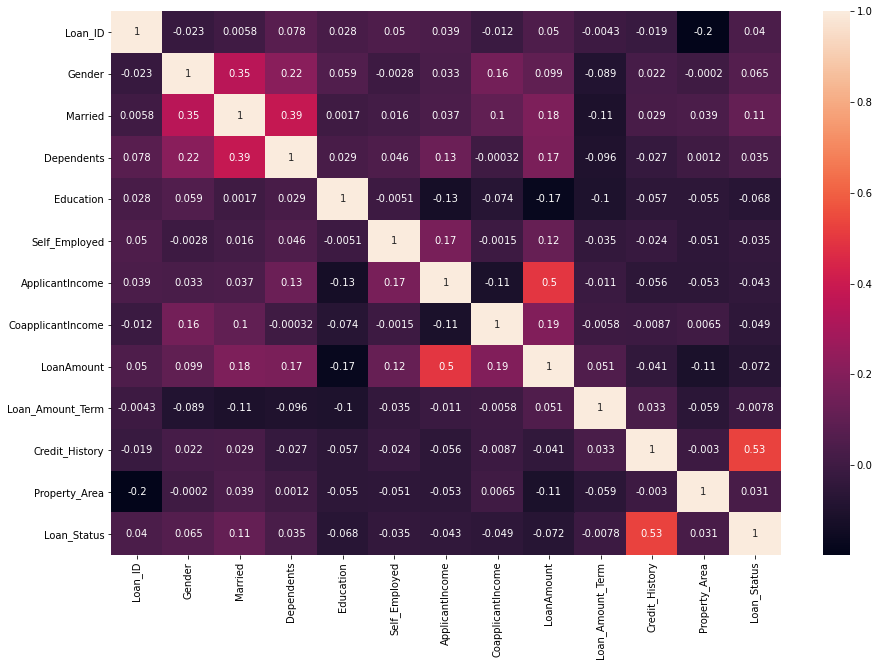

In [26]:
plt.figure(figsize=(15,10))
sns.heatmap(cor,annot=True)

Observation:
    
    Light shades are highly correlated and dark shades are negatively correated 
    
    "Loan_Status" is positively correlated with column "Credit_History",'Gender','Dependents','Property_Area', and highly            negatively correlated with column 'Education','Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'

# TO CHECK THE COUNT OF DATA IN TARGET COLUMN

### UNIVARIATE ANALYSIS

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

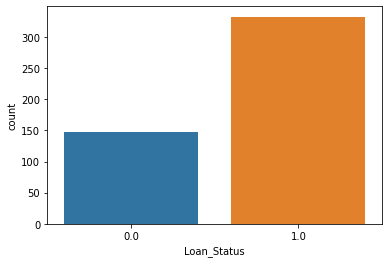

In [30]:
sns.countplot(df["Loan_Status"])

Datas are not equally distributed,class imbalanced present

# TO CHECK THE DISTRIBUTION OF DATA IN COLUMNS

<AxesSubplot:xlabel='Loan_ID', ylabel='Density'>

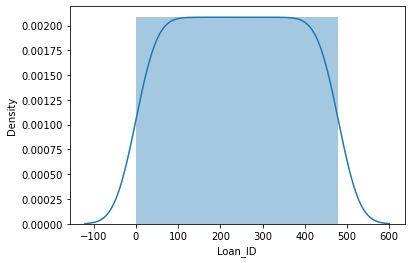

In [31]:
sns.distplot(df["Loan_ID"])

in "Loan_ID" datas are equally distributed 

<AxesSubplot:xlabel='Gender', ylabel='Density'>

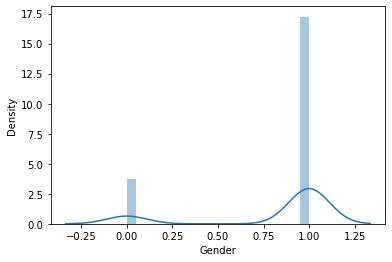

In [34]:
sns.distplot(df["Gender"])

in "Gender" skewness is present

<AxesSubplot:xlabel='Married', ylabel='Density'>

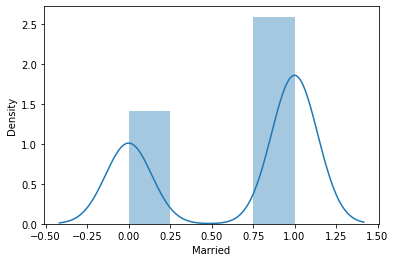

In [35]:
sns.distplot(df["Married"])

in "Married" skewness is present

<AxesSubplot:xlabel='Dependents', ylabel='Density'>

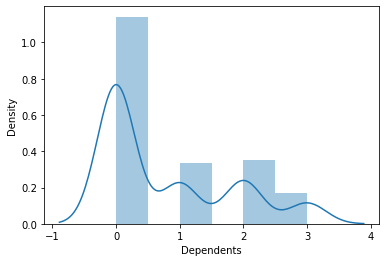

In [36]:
sns.distplot(df["Dependents"])

in "Dependents" skewness is present

<AxesSubplot:xlabel='Education', ylabel='Density'>

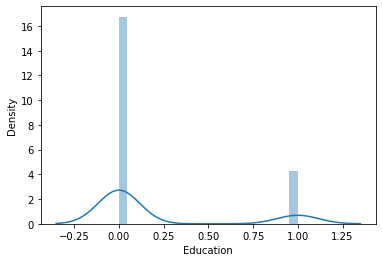

In [37]:
sns.distplot(df["Education"])

in "Education " skewness is present

<AxesSubplot:xlabel='Self_Employed', ylabel='Density'>

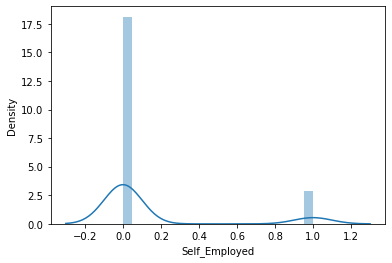

In [39]:
sns.distplot(df["Self_Employed"])

in "Self_Employed" skewness is present

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

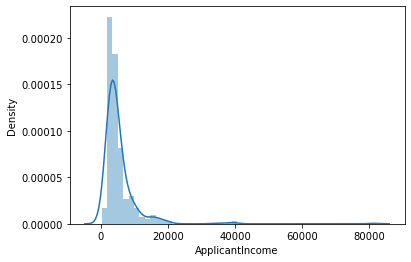

In [40]:
sns.distplot(df["ApplicantIncome"])

in "ApplicantIncome" skewness is present

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

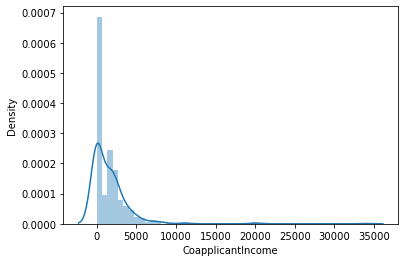

In [41]:
sns.distplot(df["CoapplicantIncome"])

in "CoapplicantIncome" skewness is present

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

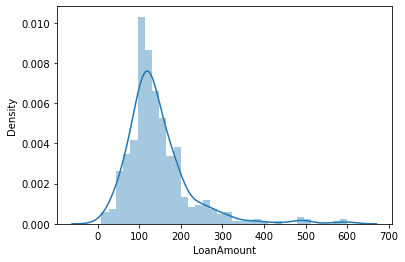

In [42]:
sns.distplot(df["LoanAmount"])

in "LoanAmount" skewness is present

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

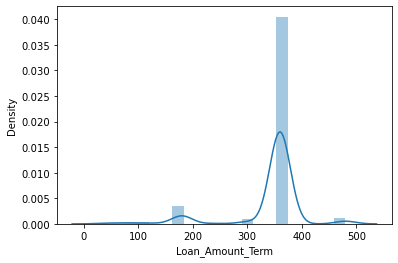

In [43]:
sns.distplot(df["Loan_Amount_Term"])

in "Loan_Amount_Term" skewness is present

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

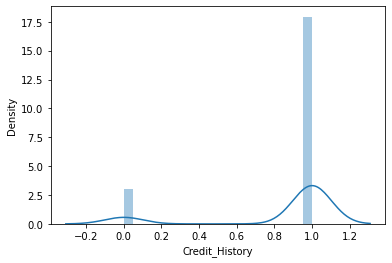

In [44]:
sns.distplot(df["Credit_History"])

in "Credit_History" skewness is present

# TO CHECK THE FREQUENCY OF THE DATA IN THE COLUMNS

### UNIVARIATE ANALYSIS

<AxesSubplot:xlabel='Loan_ID', ylabel='Count'>

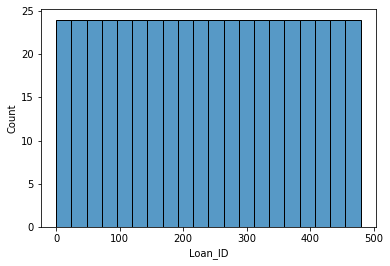

In [46]:
sns.histplot(df["Loan_ID"],bins=20)

in "Loan_ID" data count is equally distributed between 0 to 500

<AxesSubplot:xlabel='Gender', ylabel='Count'>

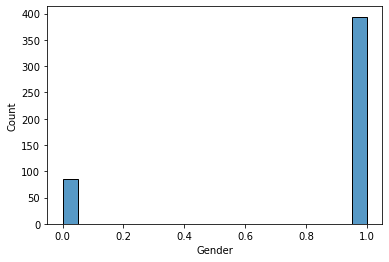

In [47]:
sns.histplot(df["Gender"],bins=20)

in "Gender" data count is between 0.0 and 1.0

<AxesSubplot:xlabel='Married', ylabel='Count'>

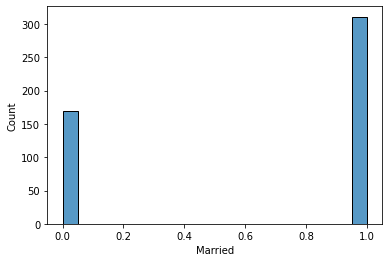

In [48]:
sns.histplot(df["Married"],bins=20)

in "Married" data count is between 0.0 and 1.0

<AxesSubplot:xlabel='Dependents', ylabel='Count'>

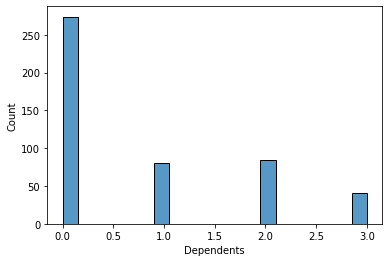

In [49]:
sns.histplot(df["Dependents"],bins=20)

in "Dependents" data count is between 0.0,1.0,2.0 and 3.0

<AxesSubplot:xlabel='Education', ylabel='Count'>

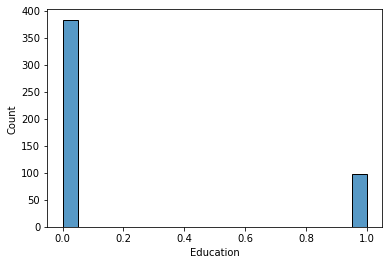

In [51]:
sns.histplot(df["Education"],bins=20)

in "Education" data count is between 0.0 and 1.0

<AxesSubplot:xlabel='Self_Employed', ylabel='Count'>

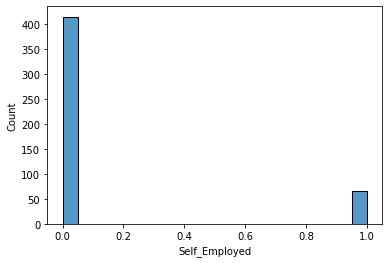

In [50]:
sns.histplot(df["Self_Employed"],bins=20)

in "Self_Employed" data count is between 0.0 and 1.0

<AxesSubplot:xlabel='Loan_Status', ylabel='Count'>

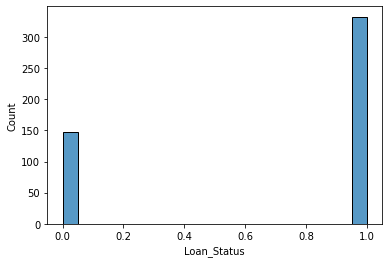

In [54]:
sns.histplot(df["Loan_Status"],bins=20)

in "Loan_Status" data count is between 0.0 and 1.0

# TO CHECK THE RELATION OF EACH COLUMN TARGET VARIABLE

### BIVARIATE ANALYSIS 

<AxesSubplot:xlabel='Loan_ID', ylabel='Loan_Status'>

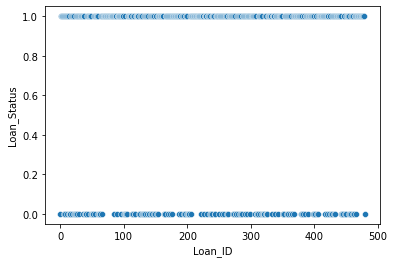

In [55]:
sns.scatterplot(x="Loan_ID",y="Loan_Status",data=df)

The "Loan_ID" has appeared from the count of 0 to 500

<AxesSubplot:xlabel='Gender', ylabel='Loan_Status'>

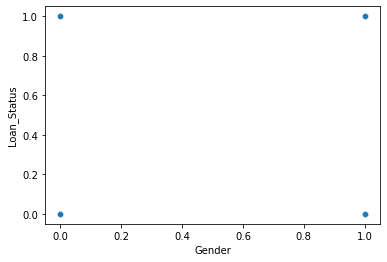

In [56]:
sns.scatterplot(x="Gender",y="Loan_Status",data=df)

The "Gender" has appeared in the count of 0.0 and 1.0

<AxesSubplot:xlabel='Married', ylabel='Loan_Status'>

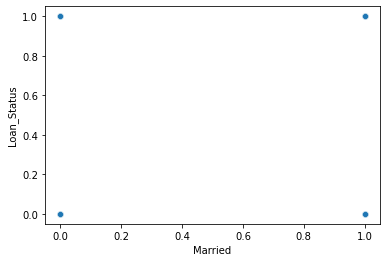

In [57]:
sns.scatterplot(x="Married",y="Loan_Status",data=df)

The "Married" has appeared in the count of 0.0 and 1.0

<AxesSubplot:xlabel='Dependents', ylabel='Loan_Status'>

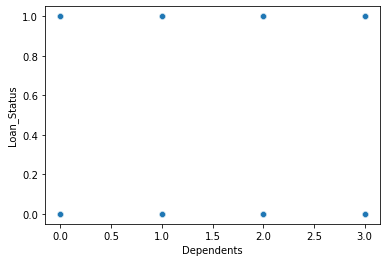

In [58]:
sns.scatterplot(x="Dependents",y="Loan_Status",data=df)

The "Dependents" has appeared in the count of 0.0,1.0,2.0 and 3.0

<AxesSubplot:xlabel='Education', ylabel='Loan_Status'>

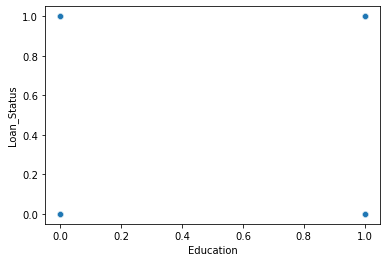

In [59]:
sns.scatterplot(x="Education",y="Loan_Status",data=df)

The "Education" has appeared in the count of 0.0 and 1.0

<AxesSubplot:xlabel='Self_Employed', ylabel='Loan_Status'>

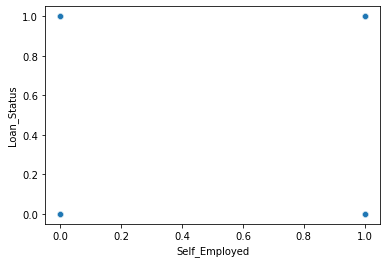

In [60]:
sns.scatterplot(x="Self_Employed",y="Loan_Status",data=df)

The "Self_Employed" has appeared in the count of 0.0 and 1.0

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Loan_Status'>

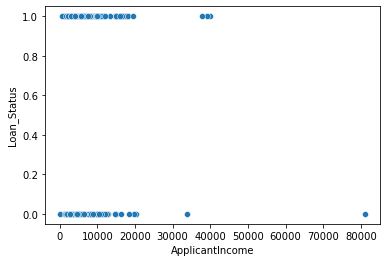

In [61]:
sns.scatterplot(x="ApplicantIncome",y="Loan_Status",data=df)

The "ApplicantIncome" has appeared in the count of 0 to 80000

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Loan_Status'>

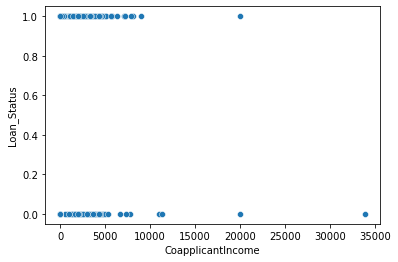

In [62]:
sns.scatterplot(x="CoapplicantIncome",y="Loan_Status",data=df)

The "CoapplicantIncome" has appeared in the count of 0 to 35000

<AxesSubplot:xlabel='LoanAmount', ylabel='Loan_Status'>

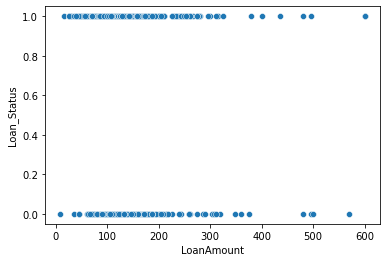

In [63]:
sns.scatterplot(x="LoanAmount",y="Loan_Status",data=df)

The "LoanAmount" has appeared in the count of 0 to 600

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Loan_Status'>

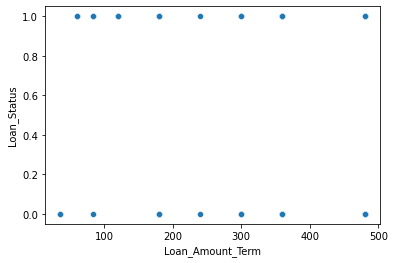

In [64]:
sns.scatterplot(x="Loan_Amount_Term",y="Loan_Status",data=df)

The "Loan_Amount_Term" has appeared in the count of 0 to 500

<AxesSubplot:xlabel='Property_Area', ylabel='Loan_Status'>

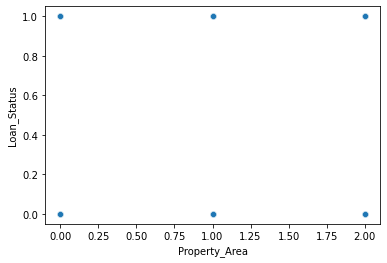

In [66]:
sns.scatterplot(x="Property_Area",y="Loan_Status",data=df)

The "Property_Area" has appeared in the count of 0.00,1.00 and 2.00

# TO CHECK THE RELATION BETWEEN ALL THE COLUMNS

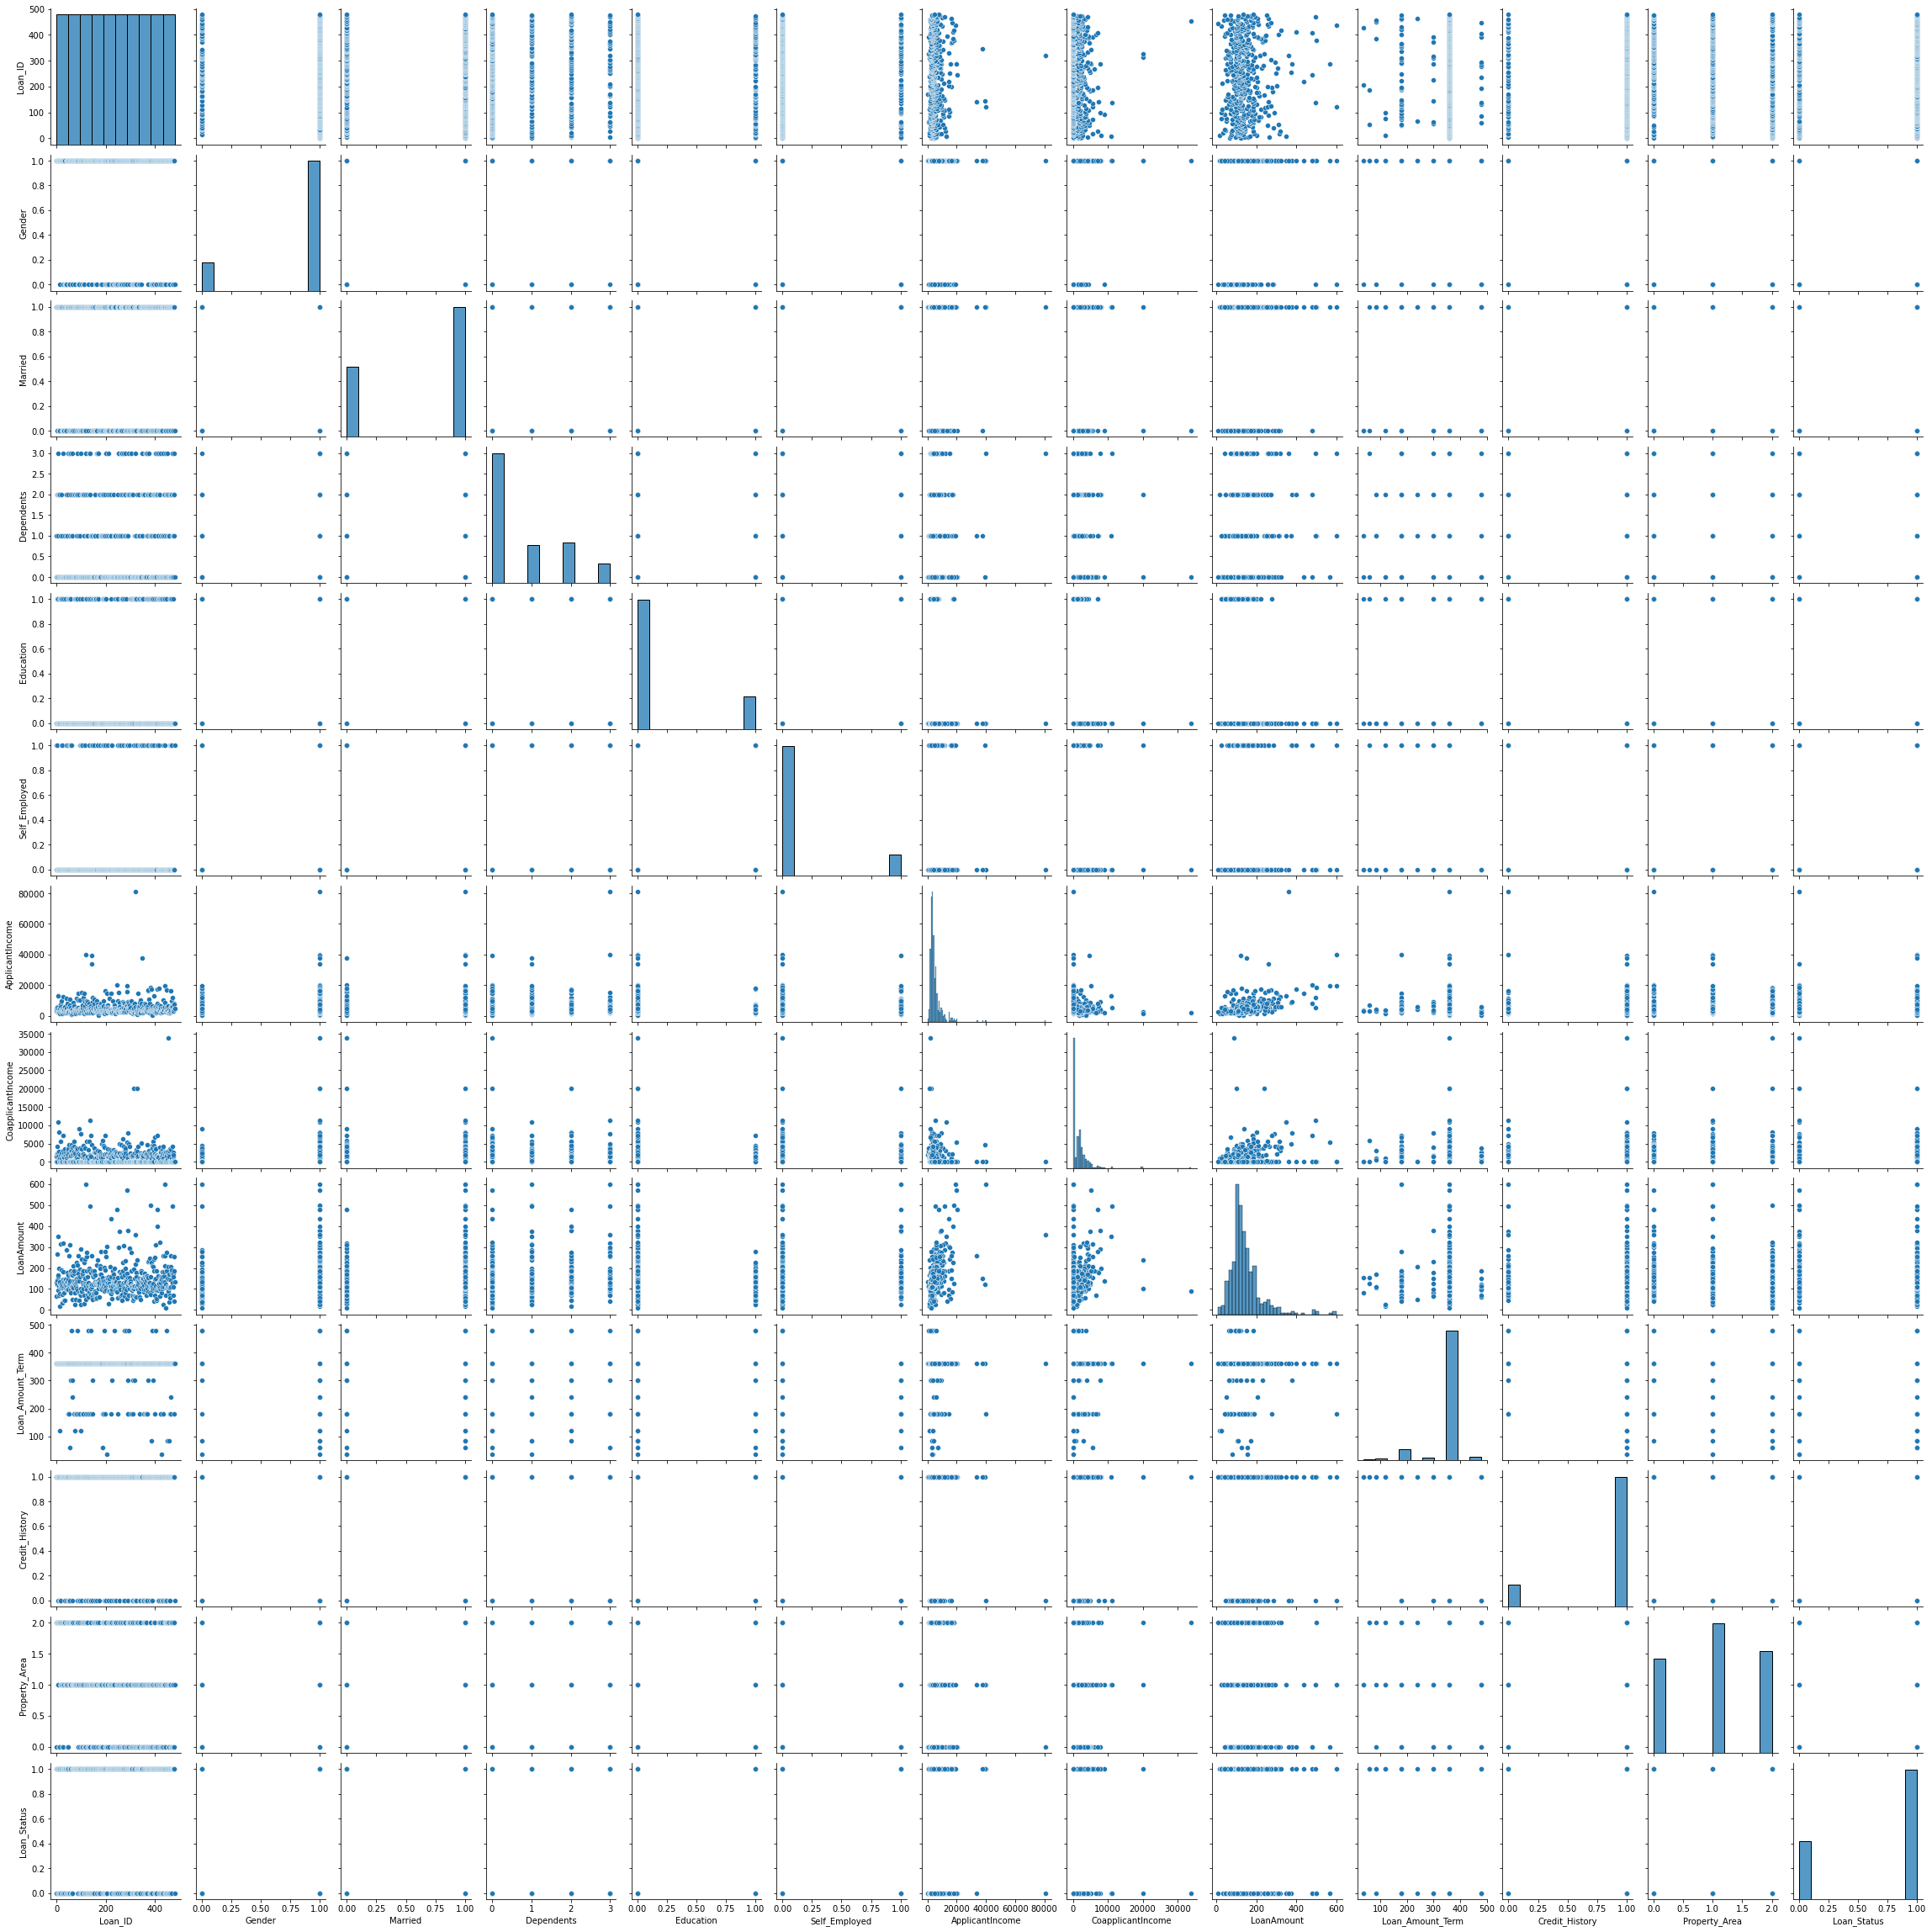

In [67]:
sns.pairplot(df)

# PLOTTING OUTLIERS

### BIVARIATE ANALYSIS

Loan_ID                 AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Gender               AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Married              AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Dependents           AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Education            AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Self_Employed        AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
ApplicantIncome      AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
CoapplicantIncome          AxesSubplot(0.125,0.125;0.0945122x0.343182)
LoanAmount              AxesSubplot(0.238415,0.125;0.0945122x0.343182)
Loan_Amount_Term        AxesSubplot(0.351829,0.125;0.0945122x0.343182)
Credit_History          AxesSubplot(0.465244,0.125;0.0945122x0.343182)
Property_Area           AxesSubplot(0.578659,0.125;0.0945122x0.343182)
Loan_Status             AxesSubplot(0.692073,0.125;0.0945122x0.343182)
dtype: object

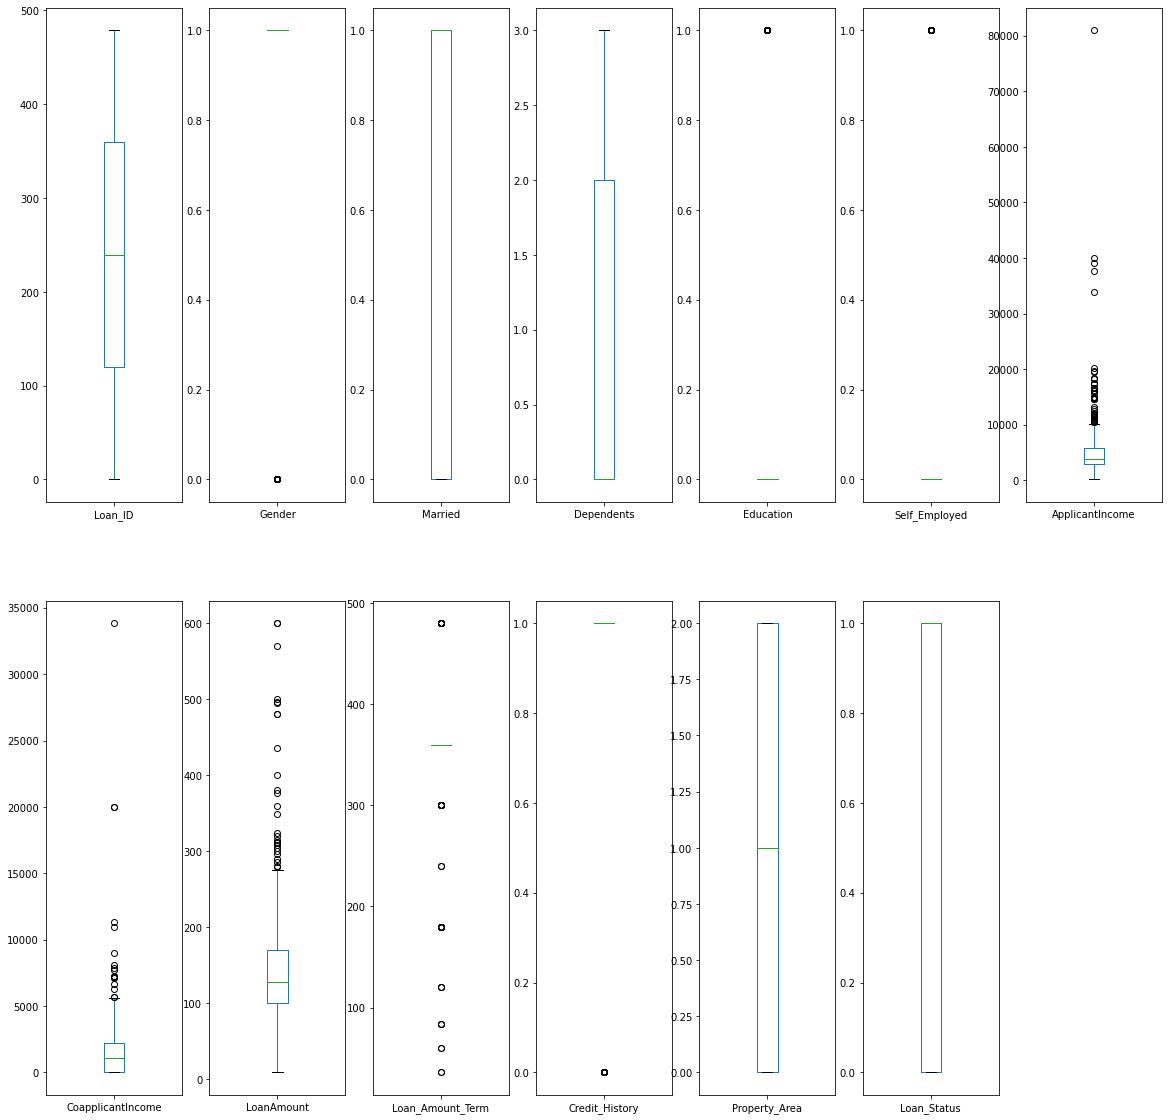

In [68]:
df.plot(kind="box",subplots=True,layout=(2,7),figsize=(20,20))    

We have outliers present in 'Gender', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History'

From the correlation and the presence of outliers in column 'CoapplicantIncome' and 'Education'we are going to drop these columns

In [70]:
df.drop(["CoapplicantIncome","Education"],axis=1,inplace=True)

In [71]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Self_Employed',
       'ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status'],
      dtype='object')

Dropped columns are no longer present in df dataset

# DETECTING OUTLIERS

In [72]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.72844612, 0.46719815, 0.73716237, ..., 0.41319694, 1.31886834,
        1.49774605],
       [1.72122923, 0.46719815, 0.73716237, ..., 0.41319694, 1.25977445,
        0.66766993],
       [1.71401233, 0.46719815, 0.73716237, ..., 0.41319694, 1.25977445,
        0.66766993],
       ...,
       [1.71401233, 0.46719815, 0.73716237, ..., 0.41319694, 1.25977445,
        0.66766993],
       [1.72122923, 0.46719815, 0.73716237, ..., 0.41319694, 1.25977445,
        0.66766993],
       [1.72844612, 2.14041943, 1.35655324, ..., 2.42015348, 0.02954695,
        1.49774605]])

In [73]:
threshold=3
print(np.where(z>3))

(array([ 12,  54,  75,  98, 120, 120, 137, 142, 144, 187, 205, 220, 244,
       286, 319, 347, 380, 386, 409, 410, 426, 438, 450, 457, 471],
      dtype=int64), array([7, 7, 7, 7, 5, 6, 6, 5, 5, 7, 7, 6, 6, 6, 5, 5, 6, 7, 6, 6, 7, 6,
       7, 7, 6], dtype=int64))


In [74]:
df_new=df[(z<3).all(axis=1)]
df_new

,Loan_ID,Gender,Married,Dependents,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0.0,1.0,1.0,1.0,0.0,4583,128.0,360.0,1.0,0.0,0.0
2,1.0,1.0,1.0,0.0,1.0,3000,66.0,360.0,1.0,2.0,1.0
3,2.0,1.0,1.0,0.0,0.0,2583,120.0,360.0,1.0,2.0,1.0
4,3.0,1.0,0.0,0.0,0.0,6000,141.0,360.0,1.0,2.0,1.0
5,4.0,1.0,1.0,2.0,1.0,5417,267.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,475.0,0.0,0.0,0.0,0.0,2900,71.0,360.0,1.0,0.0,1.0
610,476.0,1.0,1.0,3.0,0.0,4106,40.0,180.0,1.0,0.0,1.0
611,477.0,1.0,1.0,1.0,0.0,8072,253.0,360.0,1.0,2.0,1.0
612,478.0,1.0,1.0,2.0,0.0,7583,187.0,360.0,1.0,2.0,1.0


In [75]:
df.shape

(480, 11)

In [76]:
df_new.shape

(456, 11)

In [78]:
24/480

0.05

We have lost 0.05% data by removing outliers

In [79]:
df=df_new
df

,Loan_ID,Gender,Married,Dependents,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0.0,1.0,1.0,1.0,0.0,4583,128.0,360.0,1.0,0.0,0.0
2,1.0,1.0,1.0,0.0,1.0,3000,66.0,360.0,1.0,2.0,1.0
3,2.0,1.0,1.0,0.0,0.0,2583,120.0,360.0,1.0,2.0,1.0
4,3.0,1.0,0.0,0.0,0.0,6000,141.0,360.0,1.0,2.0,1.0
5,4.0,1.0,1.0,2.0,1.0,5417,267.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,475.0,0.0,0.0,0.0,0.0,2900,71.0,360.0,1.0,0.0,1.0
610,476.0,1.0,1.0,3.0,0.0,4106,40.0,180.0,1.0,0.0,1.0
611,477.0,1.0,1.0,1.0,0.0,8072,253.0,360.0,1.0,2.0,1.0
612,478.0,1.0,1.0,2.0,0.0,7583,187.0,360.0,1.0,2.0,1.0


# DIVIDING THE COLUMNS AS x AND y

In [81]:
x=df.drop("Loan_Status",axis=1)
y=df["Loan_Status"]

# APPLYING variance_inflation_factor

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [83]:
x.shape

(456, 10)

In [84]:
x.shape[1]

10

In [85]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [86]:
vif_calc()

   VIF FACTOR          features
0    3.887913           Loan_ID
1    6.163198            Gender
2    3.716572           Married
3    1.880146        Dependents
4    1.262430     Self_Employed
5    4.925974   ApplicantIncome
6    8.765452        LoanAmount
7   14.911921  Loan_Amount_Term
8    6.573369    Credit_History
9    2.723824     Property_Area


We have high correlation between column "Loan_ID" & "Married","Self_Employed" & "Dependents"

Where "Loan_ID","Self_Employed" is providing less value,hence we will drop these columns

In [87]:
df.drop(["Loan_ID","Self_Employed"],axis=1,inplace=True)

In [88]:
df

,Gender,Married,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1.0,1.0,1.0,4583,128.0,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,3000,66.0,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,2583,120.0,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,6000,141.0,360.0,1.0,2.0,1.0
5,1.0,1.0,2.0,5417,267.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,2900,71.0,360.0,1.0,0.0,1.0
610,1.0,1.0,3.0,4106,40.0,180.0,1.0,0.0,1.0
611,1.0,1.0,1.0,8072,253.0,360.0,1.0,2.0,1.0
612,1.0,1.0,2.0,7583,187.0,360.0,1.0,2.0,1.0


In [89]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'ApplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Dropped columns are no longer present in df dataset

# REMOVING THE SKEWNESS 

In [90]:
df.skew()

Gender             -1.672909
Married            -0.596826
Dependents          0.972063
ApplicantIncome     1.963473
LoanAmount          1.094997
Loan_Amount_Term   -2.024099
Credit_History     -2.001133
Property_Area      -0.045980
Loan_Status        -0.850776
dtype: float64

In [91]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method="yeo-johnson")

In [92]:
x

array([[-2.14560005,  0.46824282,  0.74586459, ...,  0.12931241,
         0.41501386, -1.35013533],
       [-2.11563931,  0.46824282,  0.74586459, ...,  0.12931241,
         0.41501386,  1.21338797],
       [-2.08993832,  0.46824282,  0.74586459, ...,  0.12931241,
         0.41501386,  1.21338797],
       ...,
       [ 1.55426965,  0.46824282,  0.74586459, ...,  0.12931241,
         0.41501386,  1.21338797],
       [ 1.55982576,  0.46824282,  0.74586459, ...,  0.12931241,
         0.41501386,  1.21338797],
       [ 1.56537849, -2.13564407, -1.34072593, ...,  0.12931241,
        -2.40955808,  0.02037496]])

Applied power_transform method to remove the skewness 

# APPLYING SMOTE TECHNIQUE FOR IMBALANCED DATA

In [93]:
from imblearn.over_sampling import SMOTE

In [94]:
smt=SMOTE()

In [95]:
train_x,train_y=smt.fit_resample(x,y)

In [96]:
train_y.value_counts()

1.0    317
0.0    317
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

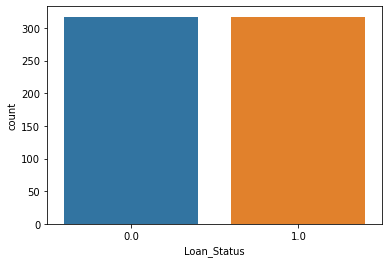

In [97]:
sns.countplot(train_y)

By using smote technique we make the data balanced 

# APPLYING SCALING

In [98]:
from sklearn.preprocessing import StandardScaler 
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-2.14560005,  0.46824282,  0.74586459, ...,  0.12931241,
         0.41501386, -1.35013533],
       [-2.11563931,  0.46824282,  0.74586459, ...,  0.12931241,
         0.41501386,  1.21338797],
       [-2.08993832,  0.46824282,  0.74586459, ...,  0.12931241,
         0.41501386,  1.21338797],
       ...,
       [ 1.55426965,  0.46824282,  0.74586459, ...,  0.12931241,
         0.41501386,  1.21338797],
       [ 1.55982576,  0.46824282,  0.74586459, ...,  0.12931241,
         0.41501386,  1.21338797],
       [ 1.56537849, -2.13564407, -1.34072593, ...,  0.12931241,
        -2.40955808,  0.02037496]])

In [99]:
x

array([[-2.14560005,  0.46824282,  0.74586459, ...,  0.12931241,
         0.41501386, -1.35013533],
       [-2.11563931,  0.46824282,  0.74586459, ...,  0.12931241,
         0.41501386,  1.21338797],
       [-2.08993832,  0.46824282,  0.74586459, ...,  0.12931241,
         0.41501386,  1.21338797],
       ...,
       [ 1.55426965,  0.46824282,  0.74586459, ...,  0.12931241,
         0.41501386,  1.21338797],
       [ 1.55982576,  0.46824282,  0.74586459, ...,  0.12931241,
         0.41501386,  1.21338797],
       [ 1.56537849, -2.13564407, -1.34072593, ...,  0.12931241,
        -2.40955808,  0.02037496]])

applying scaling technique to make all the data even 

# APPLYING VARIOUS MODEL TO GET THE BEST ACCURACY SCORE

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
lr=LogisticRegression()
from sklearn.metrics import accuracy_score 
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.20,random_state=13)

# LogisticRegression

In [102]:
lr.fit(train_x,train_y)
pred_train=lr.predict(train_x)
pred_test=lr.predict(test_x)
from sklearn.metrics import classification_report
print(classification_report(test_y,pred_test))

              precision    recall  f1-score   support

         0.0       1.00      0.39      0.56        28
         1.0       0.79      1.00      0.88        64

    accuracy                           0.82        92
   macro avg       0.90      0.70      0.72        92
weighted avg       0.85      0.82      0.79        92



We are getting the accuracy of 0.82 by using LogisticRegression 

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 

# DecisionTreeClassifier

In [104]:
dtc=DecisionTreeClassifier()
dtc.fit(train_x,train_y)
pred=dtc.predict(test_x)
acc=classification_report(test_y,pred)
print(acc)

              precision    recall  f1-score   support

         0.0       0.61      0.61      0.61        28
         1.0       0.83      0.83      0.83        64

    accuracy                           0.76        92
   macro avg       0.72      0.72      0.72        92
weighted avg       0.76      0.76      0.76        92



We are getting the accuracy of 0.76 by using DecisionTreeClassifier

# RandomForestClassifier

In [105]:
rfc=RandomForestClassifier()
rfc.fit(train_x,train_y)
pred=rfc.predict(test_x)
acc=classification_report(test_y,pred)
print(acc)

              precision    recall  f1-score   support

         0.0       0.76      0.46      0.58        28
         1.0       0.80      0.94      0.86        64

    accuracy                           0.79        92
   macro avg       0.78      0.70      0.72        92
weighted avg       0.79      0.79      0.78        92



We are getting the accuracy of 0.79 by using RandomForestClassifier

# SUPPORT VECTOR CLASSIFIER 

In [106]:
svc=SVC()
svc.fit(train_x,train_y)
pred=svc.predict(test_x)
acc=classification_report(test_y,pred)
print(acc)

              precision    recall  f1-score   support

         0.0       1.00      0.43      0.60        28
         1.0       0.80      1.00      0.89        64

    accuracy                           0.83        92
   macro avg       0.90      0.71      0.74        92
weighted avg       0.86      0.83      0.80        92



We are getting the accuracy of 0.83 by using SupportVectorClassifier

# KNeighborsClassifier

In [107]:
knn=KNeighborsClassifier()
knn.fit(train_x,train_y)
pred=knn.predict(test_x)
acc=classification_report(test_y,pred)
print(acc)

              precision    recall  f1-score   support

         0.0       1.00      0.39      0.56        28
         1.0       0.79      1.00      0.88        64

    accuracy                           0.82        92
   macro avg       0.90      0.70      0.72        92
weighted avg       0.85      0.82      0.79        92



We are getting the accuracy of 0.82 by using KNeighborsClassifier

# CHECKING THE CROSS VALIDATION SCORE WITH ACCURACY SCORE

In [108]:
from sklearn.model_selection import cross_val_score

In [111]:
cv=cross_val_score(dtc,x,y,cv=4).mean()
print(cv)

0.5855263157894737


In [112]:
cv=cross_val_score(rfc,x,y,cv=4).mean()
print(cv)

0.7543859649122806


In [113]:
cv=cross_val_score(svc,x,y,cv=4).mean()
print(cv)

0.8092105263157895


In [114]:
cv=cross_val_score(knn,x,y,cv=4).mean()
print(cv)

0.7850877192982456


LogisticRegression is providing the best accuracy_score as its has less difference between the accuracy score and cv score

# AUC ROC CURVE

In [115]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [116]:
y_pred_prob=rfc.predict_proba(test_x)[:,1]
y_pred_prob

array([0.93, 0.78, 0.39, 0.79, 0.71, 0.94, 0.56, 0.9 , 0.1 , 0.27, 0.81,
       0.82, 0.7 , 0.86, 0.95, 0.58, 0.8 , 0.71, 0.78, 0.72, 0.94, 0.32,
       0.67, 0.9 , 0.87, 0.97, 0.87, 0.74, 0.8 , 0.73, 0.91, 0.89, 0.93,
       0.95, 0.36, 0.48, 0.66, 0.76, 0.83, 0.99, 0.9 , 0.92, 0.49, 0.76,
       0.93, 0.91, 0.96, 0.48, 0.83, 0.91, 0.75, 0.8 , 0.89, 0.91, 0.93,
       0.96, 0.65, 0.9 , 0.97, 0.1 , 0.4 , 0.92, 0.91, 0.53, 0.15, 0.68,
       0.97, 0.96, 0.65, 0.2 , 0.86, 0.89, 0.86, 0.84, 0.82, 0.19, 0.72,
       0.57, 1.  , 0.83, 0.88, 0.12, 0.02, 0.76, 0.93, 0.55, 0.62, 0.07,
       0.7 , 0.8 , 0.26, 0.92])

In [117]:
fpr,tpr,threshold=roc_curve(test_y,y_pred_prob)

In [118]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.03571429,
       0.03571429, 0.14285714, 0.14285714, 0.17857143, 0.21428571,
       0.25      , 0.25      , 0.25      , 0.25      , 0.25      ,
       0.25      , 0.25      , 0.25      , 0.25      , 0.28571429,
       0.32142857, 0.32142857, 0.32142857, 0.35714286, 0.35714286,
       0.35714286, 0.39285714, 0.39285714, 0.39285714, 0.42857143,
       0.42857143, 0.46428571, 0.46428571, 0.53571429, 0.53571429,
       0.53571429, 0.57142857, 0.57142857, 0.85714286, 0.92857143,
       1.        ])

In [119]:
tpr

array([0.      , 0.015625, 0.03125 , 0.125   , 0.140625, 0.171875,
       0.203125, 0.25    , 0.3125  , 0.359375, 0.390625, 0.40625 ,
       0.4375  , 0.484375, 0.5     , 0.546875, 0.578125, 0.59375 ,
       0.65625 , 0.65625 , 0.671875, 0.71875 , 0.734375, 0.734375,
       0.75    , 0.78125 , 0.796875, 0.828125, 0.84375 , 0.84375 ,
       0.859375, 0.875   , 0.890625, 0.890625, 0.953125, 0.984375,
       0.984375, 1.      , 1.      , 1.      , 1.      ])

In [120]:
threshold

array([2.  , 1.  , 0.99, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9 , 0.89,
       0.88, 0.87, 0.86, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79, 0.78, 0.76,
       0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.68, 0.67, 0.66, 0.65, 0.62,
       0.57, 0.49, 0.48, 0.4 , 0.39, 0.12, 0.1 , 0.02])

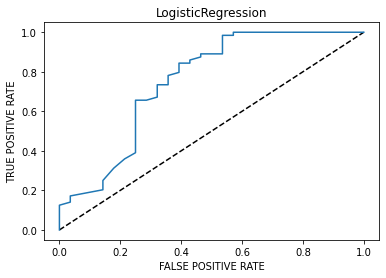

In [121]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="LogisticRegression")
plt.xlabel("FALSE POSITIVE RATE")
plt.ylabel("TRUE POSITIVE RATE")
plt.title("LogisticRegression")
plt.show()

Plotted the auc roc curve of the best model LogisticRegression 

# SAVING THE BEST MODEL

In [122]:
import joblib
joblib.dump(lr,"best_lrfile222.obj")

['best_lrfile222.obj']